In [ ]:
#To upload the Dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras import backend as K
#for model Building
#Sequential is to build the model layer by layer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
#Dense is used to represents fully connected Layer
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
#load the Dataset
tf.keras.datasets.cifar100.load_data(label_mode='fine')

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [ ]:
#Split the Dataset into Train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

<ipython-input-34-8849e07d285d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


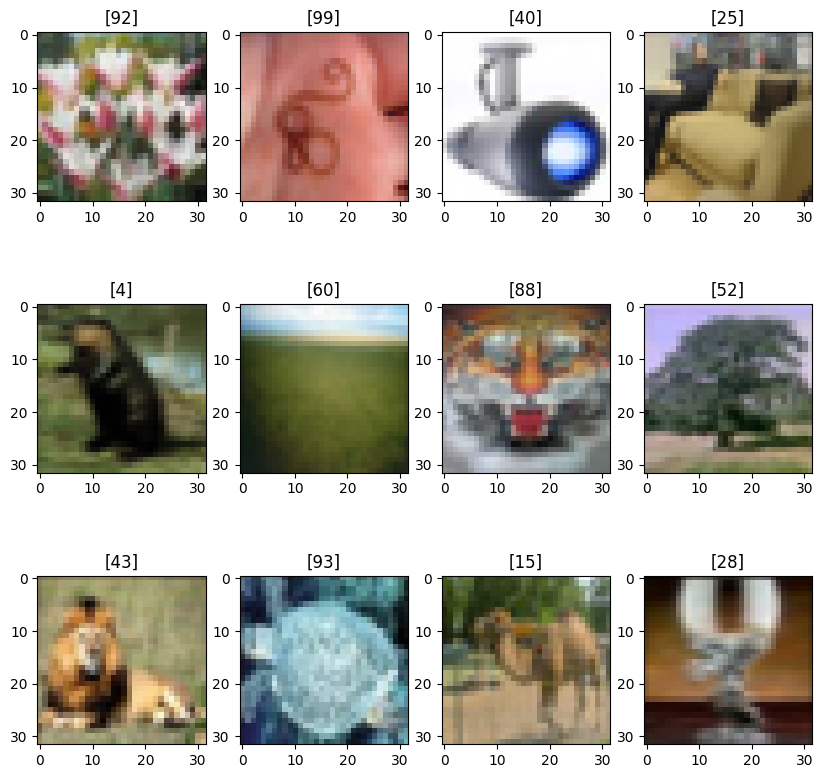

In [ ]:
import matplotlib.pyplot as plt
def show_samples(data, labels):
	plt.subplots(figsize=(10, 10))
	for i in range(12):
		plt.subplot(3, 4, i+1)
		k = np.random.randint(0, data.shape[0])
		plt.title(labels[k])
		plt.imshow(data[k])
	plt.show()
show_samples(x_train, y_train)

In [ ]:
#assign the batch_size
batchsize = 128
#assign the number of classes
num_classes = 100
#define epoch
epoch= 10
#define rows and columns
img_rows, img_cols = 32, 32

pre-prossesing

In [ ]:
#Shape of the x_train data
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#Shape of the x_test data
x_test.shape

(10000, 32, 32, 3)

In [ ]:
 # reshape the training datas and testing data
new_shape = (50000, 32*32*3)
new_shape1 = (10000, 32*32*3)
x_train_reshaped = x_train.reshape(new_shape)
x_test_reshaped = x_test.reshape(new_shape1)


In [ ]:
#Sequential is to build the model layer by layer
model = tf.keras.models.Sequential()
#First layer
model.add(Conv2D(128, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Hidden layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#dense is used to represents fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
#To show the denmenssions
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_3 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        73792     
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                      

In [ ]:
#Compile the model to train the datas
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [ ]:
#Converting the numerical to float
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped= x_test_reshaped.astype('float32')

In [ ]:
#Divide the pixels range form 0 to 1
x_train_reshaped /= 255
x_test_reshaped /= 255

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [ ]:
print(x_test_reshaped.shape)
print(y_test_one_hot.shape)
print(x_train_reshaped.shape)
print(y_train_one_hot.shape)

(10000, 3072)
(10000, 100)
(50000, 3072)
(50000, 100)


In [ ]:
model.fit(x_train, y_train_one_hot, batch_size=batchsize , epochs=epoch, validation_data=(x_test, y_test_one_hot))


Epoch 1/10
391/391 [==============================] - 16s 34ms/step - loss: 4.6589 - accuracy: 0.0389 - val_loss: 4.1164 - val_accuracy: 0.0783
Epoch 2/10
391/391 [==============================] - 12s 31ms/step - loss: 3.9089 - accuracy: 0.1091 - val_loss: 3.5882 - val_accuracy: 0.1764
Epoch 3/10
391/391 [==============================] - 11s 27ms/step - loss: 3.5257 - accuracy: 0.1725 - val_loss: 3.2304 - val_accuracy: 0.2370
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 3.2397 - accuracy: 0.2193 - val_loss: 3.0336 - val_accuracy: 0.2750
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 3.0290 - accuracy: 0.2595 - val_loss: 2.8816 - val_accuracy: 0.3047
Epoch 6/10
391/391 [==============================] - 11s 27ms/step - loss: 2.8577 - accuracy: 0.2911 - val_loss: 2.8238 - val_accuracy: 0.3114
Epoch 7/10
391/391 [==============================] - 11s 27ms/step - loss: 2.7196 - accuracy: 0.3186 - val_loss: 2.7178 - val_accuracy:

In [ ]:
model.save('Cifar__CNN.h5')

In [ ]:
p=model.predict(x_train)
p

1563/1563 [==============================] - 3s 2ms/step


array([[5.8976194e-04, 1.8249069e-03, 2.9680131e-03, ..., 1.0606102e-02,
        3.6541871e-03, 1.7062766e-03],
       [7.5254080e-05, 2.3069369e-05, 4.2220556e-05, ..., 2.9091819e-04,
        4.8138183e-05, 6.5384274e-06],
       [2.9691386e-01, 1.3268784e-02, 2.1518623e-02, ..., 1.8756693e-03,
        1.9937338e-02, 4.7930367e-03],
       ...,
       [2.9311080e-03, 3.5349239e-04, 1.9133086e-03, ..., 1.7267792e-03,
        3.2271531e-03, 1.4201420e-03],
       [1.7888774e-04, 3.0147322e-03, 1.5867096e-03, ..., 1.1064085e-03,
        1.9018122e-03, 6.5273233e-03],
       [2.6971952e-07, 6.7161270e-03, 8.7187882e-06, ..., 1.0423082e-06,
        8.8749266e-06, 8.9950841e-03]], dtype=float32)

In [ ]:
p[0]

array([5.8976194e-04, 1.8249069e-03, 2.9680131e-03, 1.6332176e-02,
       6.7115705e-03, 7.5895566e-04, 6.1666649e-03, 9.6386196e-03,
       1.1462689e-02, 1.5177124e-03, 2.2942862e-03, 4.4129803e-03,
       6.3139158e-03, 6.0625272e-03, 1.0910135e-02, 7.5419746e-02,
       1.1234115e-03, 2.6816567e-03, 1.2351538e-02, 1.7002648e-01,
       1.2803641e-04, 9.3974918e-03, 2.7286666e-03, 9.1865659e-05,
       6.8302695e-03, 2.0264285e-03, 8.4134135e-03, 8.2885697e-03,
       6.5719866e-04, 2.2250699e-02, 9.7490272e-05, 1.3212980e-02,
       2.0246743e-03, 3.5733043e-03, 5.1667267e-03, 1.9540454e-03,
       1.3049648e-03, 5.3888325e-02, 3.1119183e-02, 4.8429816e-04,
       1.9269446e-03, 1.8990269e-02, 4.3246099e-03, 1.4473752e-02,
       6.6287816e-03, 1.0056946e-02, 7.6632919e-03, 7.3115370e-04,
       1.5857080e-02, 1.2005474e-03, 3.1445031e-03, 1.3239932e-02,
       1.1786793e-03, 2.8235937e-04, 3.5861020e-03, 6.6570546e-03,
       3.0288924e-03, 1.8798475e-03, 8.7097557e-03, 3.2203582e

In [ ]:
np.argmax(p[1])

29

In [ ]:
y_train[1][0]

29

In [ ]:
model.save('cifar_Cnn.h5')

In [ ]:
from PIL import Image
import numpy as np
img_w, img_h = 200, 200
data = np.zeros((img_h, img_w, 3), dtype=np.uint8)
data[100, 100] = [255, 0, 0]
img = Image.fromarray(data, 'RGB')
img.save('test.png')
img.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import tensorflow as tf
import cv2


In [ ]:
title="cifar"

In [ ]:
model = tf.keras.models.load_model("/content/cifar_Cnn.h5")

In [ ]:
img_size=32

In [ ]:
def predict(img):

  img = cv2.resize(img, (img_size, img_size))
  img = img.reshape(1, img_size, img_size, 1)

  preds = model.predict(img)[0]

  return {label: float(pred) for label, pred in zip(labels, preds)}

label = gr.outputs.Label(num_top_classes=3)

/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [ ]:
label

label